<Center>
<h1> Credit Card Segmentation
</center>

This case requires trainees to develop a customer segmentation to define marketing strategy.The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

## DATA DICTIONARY:
    CUST_ID: Credit card holder ID
    BALANCE: Monthly average balance (based on daily balance averages)
    BALANCE_FREQUENCY: Ratio of last 12 months with balance
    PURCHASES: Total purchase amount spent during last 12 months
    ONEOFF_PURCHASES: Total amount of one-off purchases
    INSTALLMENTS_PURCHASES: Total amount of installment purchases
    CASH_ADVANCE: Total cash-advance amount
    PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase)
    ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases
    CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
    AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
    CASH_ADVANCE_TRX: Average amount per cash-advance transaction
    PURCHASES_TRX: Average amount per purchase transaction
    CREDIT_LIMIT: Credit limit
    PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
    MINIMUM_PAYMENTS: Total minimum payments due in the period.
    PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
    TENURE: Number of months as a customer

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

# from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

In [5]:
import seaborn as sns
%matplotlib inline

In [156]:
sns.set(style="ticks", color_codes=True)

In [6]:
credit = pd.read_csv('CC_GENERAL.csv')

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
credit['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [10]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



---

# a) Missing Value Treatment
       - Since there are missing values in the data so we are imputing them with median.

---

In [11]:
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We Have found that there is a 2 columns which is having missing values.

In [13]:
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(), inplace = True)
print('Credit Limit Count : ' ,credit['CREDIT_LIMIT'].count())

credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(), inplace = True)
print('Minimum Payment Count : ' ,credit['MINIMUM_PAYMENTS'].count())

Credit Limit Count :  8950
Minimum Payment Count :  8950


In [14]:

credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

---
#### Missing values has been treated successfully
---

In [372]:
# Import the data after treating the outliers
credit.to_excel('After_Treat_Missing.xlsx')


---
## Outlier Treatment

In [15]:

# Numeric Variable Summary
def numeric_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(),
                    x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25), x.quantile(0.50), 
                     x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                    index = ['N', 'NMISS', 'SUM', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 'P5',
                            'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX']
                    )

In [16]:
# Seprate the Categorical and Continuous Variable
numeric_var_names = [key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['float32', 'float64', 'int32', 'int64']]

cat_var_names = [key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['object']]

In [17]:
credit_num = credit[numeric_var_names]
credit[numeric_var_names].apply(numeric_summary).round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
N,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00
NMISS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SUM,14002049.71,7851.57,8978683.26,5302314.47,3679055.42,8760896.46,4388.64,1812.00,3261.71,1209.54,29077.00,131653.00,40223828.13,15511637.48,7561915.56,1375.75,103080.00
MEAN,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.28,1733.14,844.91,0.15,11.52
MEDIAN,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
STD,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.65,2895.06,2332.79,0.29,1.34
VAR,4332774.97,0.06,4565208.19,2755227.90,817827.43,4398096.33,0.16,0.09,0.16,0.04,46.58,617.90,13239749.82,8381394.16,5441920.02,0.09,1.79
MIN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
P1,0.07,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,500.00,0.00,20.04,0.00,6.00
P5,8.81,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1000.00,89.99,74.64,0.00,8.00


We have found that there is multiple columns is having outliers

In [19]:

# handlig Outlier
credit_num = credit_num.apply(lambda x : x.clip(lower = x.dropna().quantile(0.01), upper = x.dropna().quantile(0.95)))

In [368]:
stats_report = credit_num.apply(numeric_summary).round(2).T
stats_report

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,12996603.33,1452.13,873.39,1689.16,2853249.50,0.07,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5907.79,5909.11,5909.11
BALANCE_FREQUENCY,8950.0,0.0,7858.85,0.88,1.00,0.23,0.05,0.09,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,7373574.05,823.86,361.28,1099.81,1209588.81,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3997.90,3998.62,3998.62
ONEOFF_PURCHASES,8950.0,0.0,4009141.13,447.95,38.00,746.13,556715.28,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2668.95,2671.09,2671.09
INSTALLMENTS_PURCHASES,8950.0,0.0,3010207.56,336.34,89.00,497.83,247834.88,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1748.44,1750.09,1750.09
CASH_ADVANCE,8950.0,0.0,7313592.25,817.16,0.00,1349.18,1820282.04,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4643.58,4647.17,4647.17
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1142.35,0.13,0.00,0.18,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.58,0.58


In [370]:
stats_report.to_excel('stats_final.xlsx')

----

# Deriving New KPI

---

### 1. Monthly average purchase 

In [22]:
credit['Monthly_avg_purchase'] = credit['PURCHASES'] / credit['TENURE'] 

In [23]:
credit.Monthly_avg_purchase.head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64


### 2. Monthly Cash Advance Amount

In [24]:

credit['Monthly_cash_advance'] = credit['CASH_ADVANCE'] / credit['TENURE']

In [25]:
credit.Monthly_cash_advance.head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

### 3. Purchase By type (One-off and Intallment)

In [26]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance'],
      dtype='object')

In [28]:
credit.loc[:, ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [29]:

credit[credit['ONEOFF_PURCHASES'] == 0]['ONEOFF_PURCHASES'].count()

4302

In [30]:
credit[credit['INSTALLMENTS_PURCHASES'] == 0]['INSTALLMENTS_PURCHASES'].count()

3916

In [31]:
credit[(credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] == 0)].shape

(2042, 20)

In [32]:
credit[(credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] > 0)].shape

(2260, 20)

In [33]:
credit[(credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] > 0)].shape

(2774, 20)

In [34]:
credit[(credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] == 0)].shape

(1874, 20)


### I found out that there are 4 types of purchase behaviour in the data set. So deriving a categorical variable based on the behaviour

In [35]:

def purchase(credit):
    
   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'
    
    

In [36]:
credit['purchase_type'] = credit.apply(purchase,axis=1)

In [37]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

### 4. Average amount per purchase and cash advance transaction,

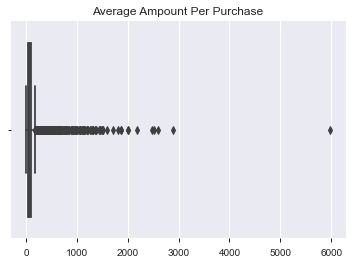

In [38]:

# credit.average_amt_per_purchase.head()
plt.title('Average Ampount Per Purchase')
sns.boxplot(credit['PURCHASES']/credit['PURCHASES_TRX'])

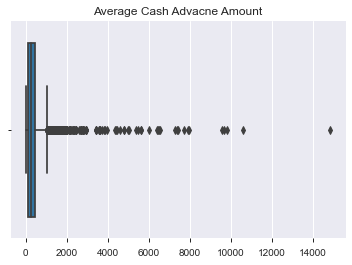

In [39]:
# credit.cash_adv_amt.head()
plt.title('Average Cash Advacne Amount')
sns.boxplot(credit['CASH_ADVANCE'] / (credit['CASH_ADVANCE_TRX']))

---
## 4. Limit_usage (shows credit-score ) credit card utilization
   - Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [65]:
credit['limit_usage'] = credit.apply(lambda x: x['BALANCE'] / x['CREDIT_LIMIT'], axis=1)

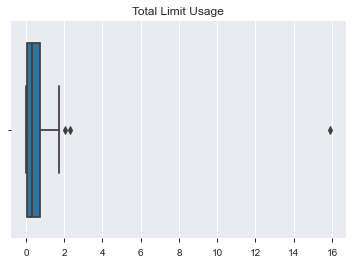

In [40]:
# credit.limit_usage.head()
plt.title('Total Limit Usage')
sns.boxplot(credit['BALANCE'] / credit['CREDIT_LIMIT'])

---
## 5. Payments to minimum payments ratio etc.

In [42]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'purchase_type'],
      dtype='object')

In [43]:
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [44]:
credit['PAYMENTS'].isnull().value_counts()

False    8950
Name: PAYMENTS, dtype: int64

In [45]:
# credit['payment_minimum'] = credit.apply(lambda x : x['PAYMENTS'] / x['MINIMUM_PAYMENTS'], axis = 1)
pay_min = credit['PAYMENTS'] / credit['MINIMUM_PAYMENTS']

In [66]:
credit['payment_minpay'] = credit.apply(lambda x:x['PAYMENTS'] / x['MINIMUM_PAYMENTS'],axis=1)

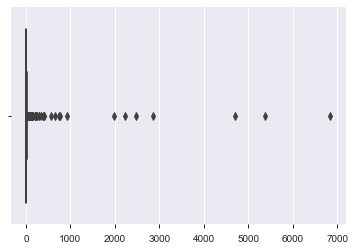

In [46]:
sns.boxplot(credit['PAYMENTS'] / credit['MINIMUM_PAYMENTS'])

In [67]:
credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_advance                0
purchase_type                       0
limit_usage                         0
payment_minpay                      0
dtype: int64

In [68]:
credit.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
purchase_type                        object
limit_usage                         float64
payment_minpay                  

# b) Extreme value Treatment
- Since there are variables having extreme values, I am doing log-transformation on the dataset to remove outlier effect 

In [69]:
# log tranformation
credit_log = credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [70]:
credit_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [78]:
credit_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')

In [80]:
col = ['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']

cr_pre = credit_log[[x for x in credit_log.columns if x not in col]]


--- 
## Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
---

In [71]:
# Average payment_minimum ratio for each purchse type.
x =  credit.groupby('purchase_type').apply(lambda x : np.mean(credit['PAYMENTS'] / credit['MINIMUM_PAYMENTS']))

In [72]:
x

purchase_type
both_oneoff_installment    9.059164
installment                9.059164
none                       9.059164
one_off                    9.059164
dtype: float64

In [73]:
import seaborn as sns

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

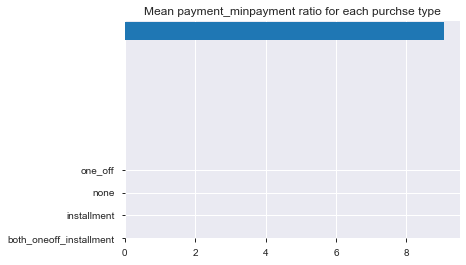

In [75]:
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(x, width=x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

---
## Customer with installment purchases are paying dues 

In [55]:

credit.purchase_type.value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

Text(0.5, 1.0, 'Average Monthly Cash Advance taken by customer on different Purchase Type')

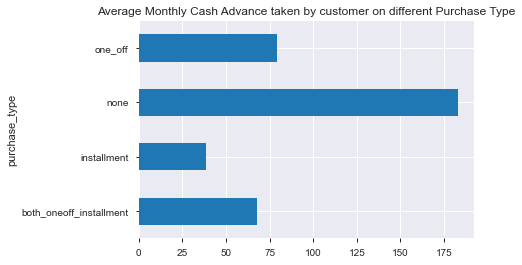

In [56]:

credit.groupby('purchase_type').apply(lambda x : np.mean(x['Monthly_cash_advance'])).plot.barh()
plt.title('Average Monthly Cash Advance taken by customer on different Purchase Type')

In [57]:

credit.groupby('purchase_type').apply(lambda x : np.mean(credit['BALANCE'] / credit['CREDIT_LIMIT']))

purchase_type
both_oneoff_installment    0.388884
installment                0.388884
none                       0.388884
one_off                    0.388884
dtype: float64

Text(0.5, 1.0, '')

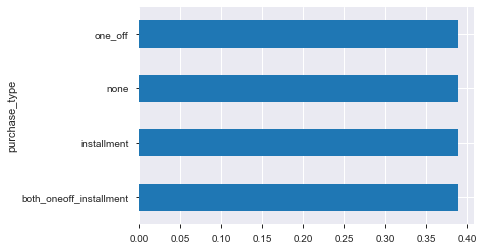

In [58]:

credit.groupby('purchase_type').apply(lambda x : np.mean(credit['BALANCE'] / credit['CREDIT_LIMIT'])).plot.barh()
plt.title('')

In [76]:
# Original dataset with categorical column converted to number type.
cre_original = pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [81]:
# creating Dummies for categorical variable
cr_pre['purchase_type'] = credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,both_oneoff_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [84]:
credit_dummy = pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [85]:
l = ['purchase_type']
l

['purchase_type']

In [90]:
credit_dummy = credit_dummy.drop(l, axis=1)
credit_dummy.isnull().any()

KeyError: "['purchase_type'] not found in axis"

In [89]:
cr_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'purchase_type'],
      dtype='object')



## Correlation with heatmap

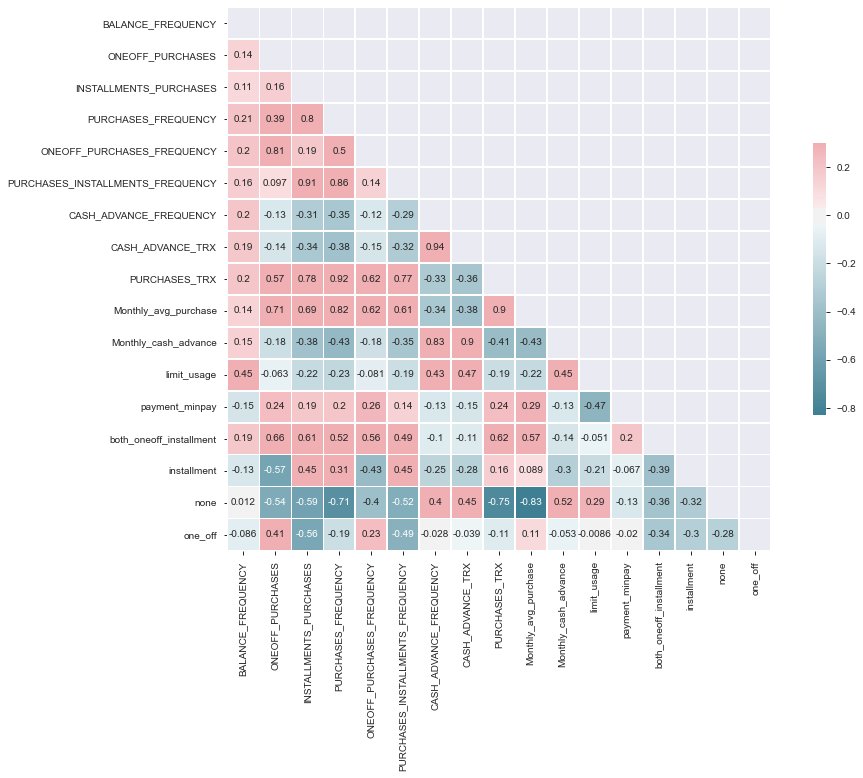

In [91]:
corr = credit_dummy.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax =.3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)

<big>
- Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
</big>


- Before applying PCA we will standardize data  to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

In [358]:
# importimg the Correlation matrix into CSV
corr.to_csv('Correlation.csv')


---
## Standardize the data
---

In [92]:

from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()

In [94]:

df_std = pd.DataFrame(sc.fit_transform(credit_dummy))

In [95]:

#Renameing the columns after Scaling the DataFrame
for i in range(len(credit_num.columns)):
    df_std.rename(columns = {i : credit_num.columns[i]}, inplace=True)
    
df_std.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.148757,-0.987090,0.394480,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-0.429030,-0.890667,-1.022796,-0.492437,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,-1.523373,1.697282,0.322182,0.230261,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,0.564294,-0.890667,-0.035495,-0.711225,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,0.891164,0.302372,-0.381199,-1.444107,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.100298,-0.890667,0.893219,-0.032167,-0.670193,-0.581221,-0.543690,1.943162



<b> Data has been Standard Scaled now </b>

## Applying PCA

In [96]:
from sklearn.decomposition import PCA

In [98]:
var_ratio = {}
for n in range(4,15):
    pc = PCA(n_components = n)
    cr_pca = pc.fit(df_std)
    var_ratio[n] = sum(cr_pca.explained_variance_ratio_)

In [99]:
var_ratio

{4: 0.8115442762351257,
 5: 0.8770555795291434,
 6: 0.9186492443512613,
 7: 0.9410925256030128,
 8: 0.9616114053683066,
 9: 0.9739787081990646,
 10: 0.9835896584630702,
 11: 0.9897248107341952,
 12: 0.9927550009135216,
 13: 0.9953907562385423,
 14: 0.9979616898169592}

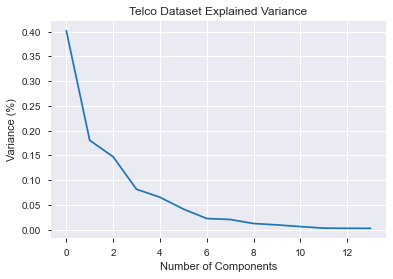

In [124]:
# Screen Plot - Plotting Explained Variance % by each componet
plt.figure()
plt.plot(pc.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Telco Dataset Explained Variance')
plt.show()

In [100]:
pc5 = PCA(n_components = 5)

In [102]:
p = pc5.fit(df_std)

In [103]:
df_std.shape

(8950, 17)

In [134]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ])

In [130]:
var1 = np.cumsum(pc.explained_variance_ratio_).round(2)
var1

array([0.4 , 0.58, 0.73, 0.81, 0.88, 0.92, 0.94, 0.96, 0.97, 0.98, 0.99,
       0.99, 1.  , 1.  ])

In [135]:
# pd.DataFrame({'Eigen_value' : pc.explained_variance_, 'Cumm_variance' : var1}, index=range(1,14))

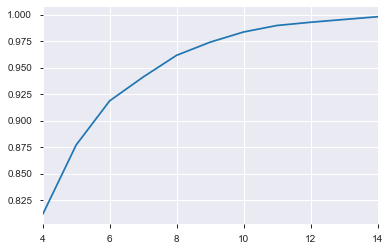

In [105]:
pd.Series(var_ratio).plot()

As we have seen by visualization, 5 Components explaining a variance.

###  Creating stats of Eigen Values for Report
---

In [375]:
eigen_values_stats = pc.explained_variance_
cumm_var_stats = np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
pct_var_stats = eigen_values_stats / sum(eigen_values_stats)
cum_pct_var = np.cumsum(np.round(pct_var_stats, decimals = 4))

In [379]:
eigen_values_stats
cumm_var_stats
pct_var_stats
cum_pct_var

array([0.4029, 0.5839, 0.7315, 0.8133, 0.8789, 0.9206, 0.9431, 0.9637,
       0.9761, 0.9857, 0.9918, 0.9948, 0.9974, 1.    ])

In [381]:
# Creating a dataframe For these stats
Eigen_df_stats = pd.DataFrame({'eigen_corr_values' : eigen_values_stats, 'cum_sum_eigen' : cumm_var_stats,
                              'pct_var' : pct_var_stats, 'cum_pct_var' : cum_pct_var })


# import the data into excel form for statistics of report
Eigen_df_stats.to_excel('Eigen_stats.xlsx')

---
# Since 5 components are explaining about 87% variance so we select 5 components

---



In [107]:
pc_final = PCA(n_components=5).fit(df_std)

reduced_cr = pc_final.fit_transform(df_std)

In [108]:
df = pd.DataFrame(reduced_cr)

In [109]:
df.shape

(8950, 5)

In [110]:
cols = credit_dummy.columns

In [111]:
cols

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [113]:
pd.DataFrame(pc_final.components_.T, columns = ['PC_' + str(i) for i in range(5)], index = cols)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [115]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [138]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T, columns = credit_dummy.columns).T
#Method 2 - Use factor loading to hand pick important vars from each component based loading + business importance
Loadings.to_csv('loadings_pca.csv')

# Clustering 

---
<big>

Based on the intuition on type of purchases made by customers and their distinctive behavior exhibited based on the purchase_type (as visualized above in Insights from KPI) , I am starting with 4 clusters.

</big>

---

In [116]:
 from sklearn.cluster import KMeans

In [117]:
km_4 = KMeans(n_clusters = 4, random_state = 123)

In [119]:
km_4.fit(df)
km_4.labels_

array([3, 1, 0, ..., 3, 1, 0])

In [120]:
pd.Series(km_4.labels_).value_counts()

2    2758
3    2228
1    2090
0    1874
dtype: int64

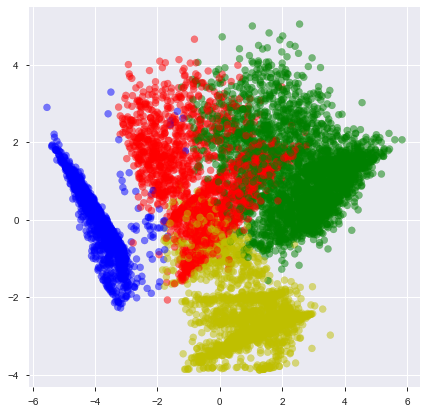

In [122]:
color_map = {0:'r', 1:'b', 2:'g', 3:'y'}
label_color = [color_map[l] for l in km_4.labels_]
plt.figure(figsize = (7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=label_color, cmap='Spectral', alpha=0.5)



In [143]:
reduced_cr

array([[-0.24284083, -2.75966826,  0.34306143, -0.41735858, -0.00710011],
       [-3.97565157,  0.14462517, -0.54298934,  1.02383244, -0.42892918],
       [ 1.28739573,  1.50893846,  2.70996571, -1.89225201,  0.01080872],
       ...,
       [ 1.15635917, -2.79886435, -0.53630617, -0.68123998,  0.32571138],
       [-3.24994984, -1.01563269,  0.47383805,  0.81560314, -1.1252025 ],
       [ 0.23881353,  2.22337787,  1.83957974, -1.10781393,  1.74565743]])

In [141]:
df_pair_plot = pd.DataFrame(reduced_cr, columns = ['PC_' + str(i) for i in range(5)])

In [144]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929
2,1.287396,1.508938,2.709966,-1.892252,0.010809
3,-1.047613,0.673103,2.501794,-1.306784,0.761348
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969


In [232]:
df_pair_plot['cluster_4'] = km_4.labels_

In [146]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,cluster_4
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,3
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,1
2,1.287396,1.508938,2.709966,-1.892252,0.010809,0
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,0
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonpara

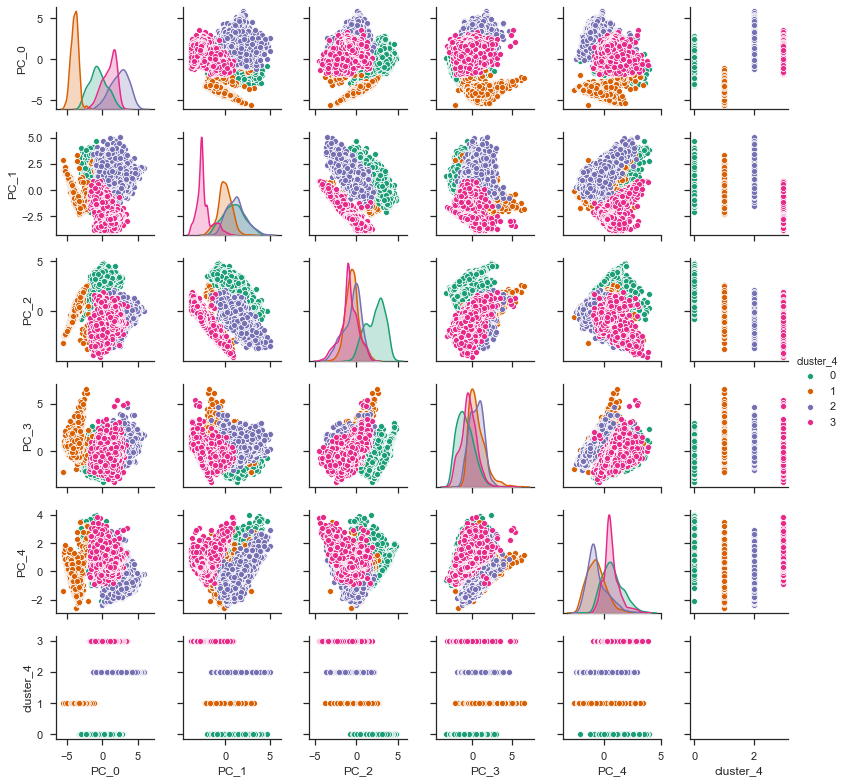

In [157]:
# sns.pairplot(df_pair_plot, hue = 'Cluster', palette = 'Dark2', diag_kind = 'kde', size = 1.5)

#pairwise relationship of components on the data
sns.pairplot(df_pair_plot, hue = 'cluster_4', palette = 'Dark2', diag_kind ='kde',size=1.85)

In [158]:
km_4=KMeans(n_clusters=4,random_state=123).fit(df)
#km_5.labels_

km_5=KMeans(n_clusters=5,random_state=123).fit(df)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(df)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(df)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(df)
#km_5.labels_

In [160]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
credit_dummy['cluster_4'] = km_4.labels_
credit_dummy['cluster_5'] = km_5.labels_
credit_dummy['cluster_6'] = km_6.labels_
credit_dummy['cluster_7'] = km_7.labels_
credit_dummy['cluster_8'] = km_8.labels_

In [162]:
credit_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,...,payment_minpay,both_oneoff_installment,installment,none,one_off,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,...,0.894662,0,1,0,0,3,1,3,2,6
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,...,1.574068,0,0,1,0,1,0,1,1,1
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,...,0.688979,0,0,0,1,0,3,0,6,3
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,...,0.000000,0,0,0,1,0,3,0,6,3
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,...,1.327360,0,0,0,1,0,3,0,6,3


In [163]:
km_4.cluster_centers_

array([[-0.54698322,  0.99154492,  2.30457818, -0.9049889 ,  0.77482504],
       [-3.86373879, -0.02076424, -0.47797603,  0.60061435, -0.64570427],
       [ 2.47652273,  1.26126228, -0.49791403,  0.52259132, -0.56844665],
       [ 1.01950985, -2.37418485, -0.87351307, -0.44868509,  0.65711405]])

In [165]:
pd.Series(km_4.labels_).value_counts()

2    2758
3    2228
1    2090
0    1874
dtype: int64

In [166]:
pd.Series(km_5.labels_).value_counts()

1    2131
0    2084
2    1985
3    1860
4     890
dtype: int64

In [167]:
pd.Series(km_6.labels_).value_counts()

3    2131
1    2078
2    1973
0    1186
5     883
4     699
dtype: int64

In [196]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI 
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [197]:
# Conactenating labels found through Kmeans with data 
cluster_df_4 = pd.concat([cre_original[col_kpi], pd.Series(km_4.labels_, name='Cluster_4')], axis = 1)

In [198]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,3
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [199]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4 = cluster_df_4.groupby('Cluster_4').apply(lambda x : x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.118997,0.045933,33.125453,12.053860
Monthly_avg_purchase,69.758276,0.159337,193.696083,47.573598
Monthly_cash_advance,77.843485,186.298043,67.620006,33.489846
limit_usage,0.378727,0.576217,0.354487,0.264275
CASH_ADVANCE_TRX,2.864995,6.552632,2.807107,1.019300
payment_minpay,5.561421,9.927979,7.268605,13.402660
both_oneoff_installment,0.003735,0.002392,1.000000,0.001795
installment,0.000000,0.017225,0.000000,0.998205
one_off,0.996265,0.003349,0.000000,0.000000
none,0.000000,0.977033,0.000000,0.000000


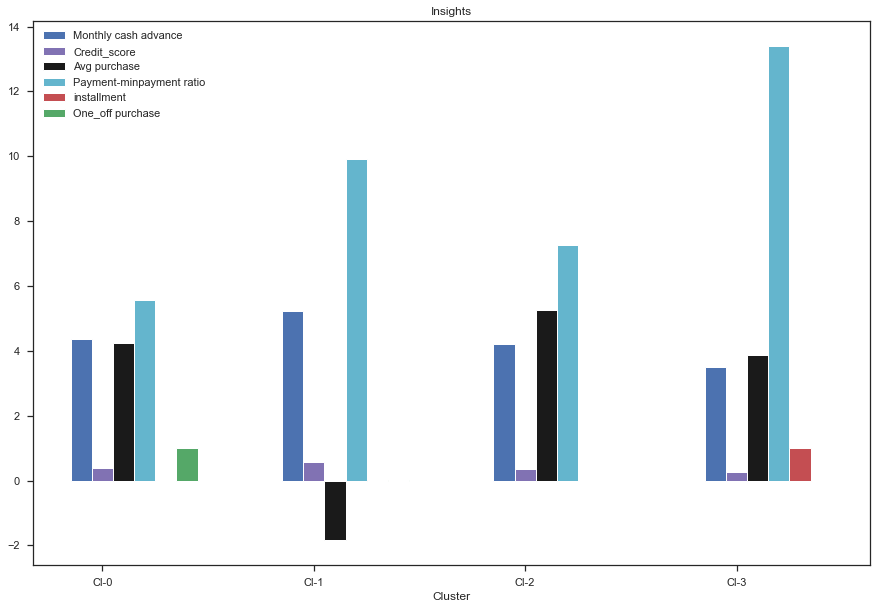

In [204]:
fig,ax = plt.subplots(figsize=(15,10))
index = np.arange(len(cluster_4.columns))

cash_advance = np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score = (cluster_4.loc['limit_usage',:].values)
purchase = np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment = cluster_4.loc['payment_minpay',:].values
installment = cluster_4.loc['installment',:].values
one_off = cluster_4.loc['one_off',:].values


bar_width=.10
b1 = plt.bar(index, cash_advance, color = 'b', label = 'Monthly cash advance', width=bar_width)
b2 = plt.bar(index+ bar_width, credit_score, color='m', label= 'Credit_score', width=bar_width)
b3 = plt.bar(index+2*bar_width, purchase, color = 'k', label = 'Avg purchase', width=bar_width)
b4 = plt.bar(index+3*bar_width,payment,color='c',label= 'Payment-minpayment ratio',width=bar_width)
b5 = plt.bar(index+4*bar_width,installment, color = 'r', label = 'installment', width = bar_width)
b6 = plt.bar(index+5*bar_width,one_off, color = 'g', label = 'One_off purchase', width= bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [207]:
pd.Series(km_4.labels_).value_counts() / sum(pd.Series(km_4.labels_).value_counts())

2    0.308156
3    0.248939
1    0.233520
0    0.209385
dtype: float64

---
# Cluster are clearly distinguish bahaviour within clustomer
---

<big>

- Cluster 2 is the group of customer who is having <b> highest </b> Monthly Average Purchase and doing both installement as well as purchas transaction and having comparitively high credit score. *** This group is about 31% of the total customer base ***






- Cluster 3 cutomer have maximum credit score and are paying dues and are doing maximum installment purchases. *** This group is about 24% of the total customer base ***





- Cluster 1 taking maximum advance cash and comparatively paying less minimum payment and poor credit score and doing no purchase. *** This group is about 23% of the total customer base. ***



- Cluster 0 customers are doing maximum One_Off transactions  and  least payment ratio. *** This group is about 21% of the total customer base ***

</big>

## Finding through clustering is validating insights derived from KPI's
----

In [224]:
s = cluster_df_4.groupby('Cluster_4').apply(lambda x : x['Cluster_4'].value_counts())
# print(s)

# Calculating Percentage
per = pd.Series((s.values.astype('float') / cluster_df_4.shape[0]) * 100, name = 'Percentage')
# print(per)

# Concatinating both series 
pd.concat([pd.Series(s.values, name =  'Size'), per], axis = 1 )

,Size,Percentage
0,1874,20.938547
1,2090,23.351955
2,2758,30.815642
3,2228,24.893855


---
## Finding Behaviour With 5 Cluster
---

In [233]:
km_5 = KMeans(n_clusters = 5, random_state = 123)
km_5.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [234]:
km_5.labels_

array([1, 0, 3, ..., 1, 0, 3])

In [235]:
pd.Series(km_5.labels_).value_counts()

1    2131
0    2084
2    1985
3    1860
4     890
dtype: int64

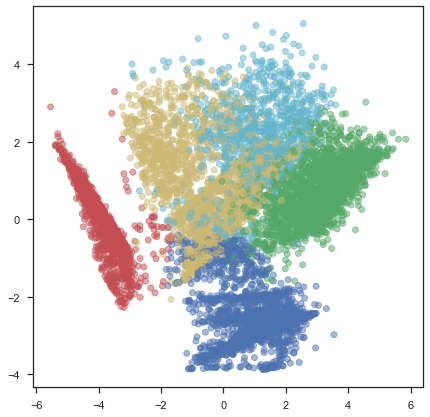

In [266]:
color_map = {0:'r', 1:'b', 2:'g', 3:'y', 4:'c'}
label_color = [color_map[l] for l in km_5.labels_]
plt.figure(figsize = (7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=label_color, cmap='Spectral', alpha=0.5)

In [237]:
reduced_cr

array([[-0.24284083, -2.75966826,  0.34306143, -0.41735858, -0.00710011],
       [-3.97565157,  0.14462517, -0.54298934,  1.02383244, -0.42892918],
       [ 1.28739573,  1.50893846,  2.70996571, -1.89225201,  0.01080872],
       ...,
       [ 1.15635917, -2.79886435, -0.53630617, -0.68123998,  0.32571138],
       [-3.24994984, -1.01563269,  0.47383805,  0.81560314, -1.1252025 ],
       [ 0.23881353,  2.22337787,  1.83957974, -1.10781393,  1.74565743]])

In [239]:
df_pair_plot_cluster_5 = pd.DataFrame(reduced_cr, columns = ['PC_' + str(i) for i in range(5)])

In [241]:
# Appending the labels of cluster 5 with new DataFrame called df_pairplot_cluster_5
df_pair_plot_cluster_5['cluster_5'] = km_5.labels_

In [242]:
df_pair_plot_cluster_5.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,cluster_5
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,1
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,0
2,1.287396,1.508938,2.709966,-1.892252,0.010809,3
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,3
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,3


In [245]:
cluster_df_5 = pd.concat([cre_original[col_kpi], pd.Series(km_5.labels_, name = 'cluster_5')], axis = 1)

In [247]:
cluster_df_5.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,cluster_5
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,1
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,0
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3


In [442]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_5 = cluster_df_5.groupby('cluster_5').apply(lambda x : x[col_kpi].mean()).T
np.round(cluster_5, decimals=2)

cluster_5,0,1,2,3,4
PURCHASES_TRX,0.04,11.90,34.54,7.07,27.55
Monthly_avg_purchase,0.10,47.24,209.81,68.69,141.75
Monthly_cash_advance,185.11,19.16,4.00,73.64,252.66
limit_usage,0.58,0.25,0.26,0.38,0.60
CASH_ADVANCE_TRX,6.45,0.48,0.15,2.65,10.52
payment_minpay,9.95,13.86,8.57,5.54,3.92
both_oneoff_installment,0.00,0.00,1.00,0.00,0.88
installment,0.02,1.00,0.00,0.00,0.11
one_off,0.00,0.00,0.00,1.00,0.01
none,0.98,0.00,0.00,0.00,0.00


In [444]:
np.round(cluster_4, decimals=2)

,Grp1,Grp2,Grp3,Grp4
PURCHASES_TRX,7.12,0.05,33.13,12.05
Monthly_avg_purchase,69.76,0.16,193.70,47.57
Monthly_cash_advance,77.84,186.30,67.62,33.49
limit_usage,0.38,0.58,0.35,0.26
CASH_ADVANCE_TRX,2.86,6.55,2.81,1.02
payment_minpay,5.56,9.93,7.27,13.40
both_oneoff_installment,0.00,0.00,1.00,0.00
installment,0.00,0.02,0.00,1.00
one_off,1.00,0.00,0.00,0.00
none,0.00,0.98,0.00,0.00


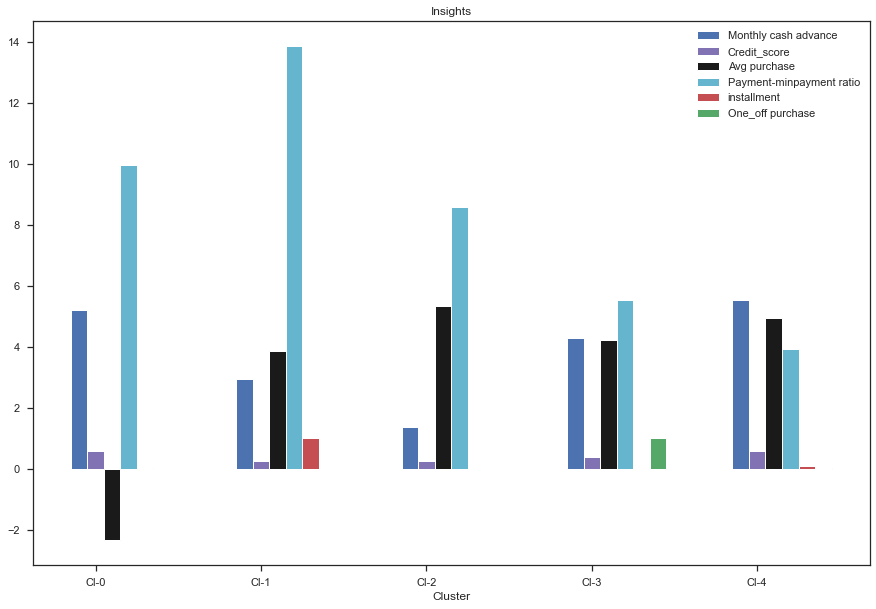

In [281]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_5.loc['limit_usage',:].values)
purchase= np.log(cluster_5.loc['Monthly_avg_purchase',:].values)
payment=cluster_5.loc['payment_minpay',:].values
installment=cluster_5.loc['installment',:].values
one_off=cluster_5.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))

plt.legend()

---
# With 5 Clusters : 
---


- We hava a group of customer (cluster 2) having a maximum Monthly Average Purchase and cluster 4 is having a group of customer having a maximum Monthly Cash in advance and doing both_one_off_installment and having secomd highest purchase but mostly same behaviour for Purchasing



- Cluster 0 and Cluster 4 is having a similar nature in terms of credit limit and Cash in Advcance.



- Cluster 3 is doing mostly oneoff purchasing and utilize the limit in better way and havig third highest in terms of Monthly Cash Advance.

## So, We dont have quite distinguish information with 5 clusters.

In [258]:
c5 = cluster_df_5.groupby('cluster_5').apply(lambda x : x['cluster_5'].value_counts())
c5

c5per = pd.Series((c5.values.astype('float') / cluster_df_5.shape[0]) * 100, name = 'Percentage')
c5per

# Concating both
pd.concat([pd.Series(c5.values, name = 'Size'), c5per], axis = 1)

,Size,Percentage
0,2084,23.284916
1,2131,23.810056
2,1985,22.178771
3,1860,20.782123
4,890,9.944134


---
# Finding Behaviour with cluster 6
---

In [260]:
km_6 = KMeans(n_clusters = 6, random_state = 1234)
km_6.fit(reduced_cr)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [261]:
km_6.labels_

array([0, 2, 4, ..., 0, 2, 5])

In [264]:
pd.Series(km_6.labels_).value_counts()

0    2131
2    2078
3    1973
4    1187
1     883
5     698
dtype: int64

In [265]:
reduced_cr

array([[-0.24284083, -2.75966826,  0.34306143, -0.41735858, -0.00710011],
       [-3.97565157,  0.14462517, -0.54298934,  1.02383244, -0.42892918],
       [ 1.28739573,  1.50893846,  2.70996571, -1.89225201,  0.01080872],
       ...,
       [ 1.15635917, -2.79886435, -0.53630617, -0.68123998,  0.32571138],
       [-3.24994984, -1.01563269,  0.47383805,  0.81560314, -1.1252025 ],
       [ 0.23881353,  2.22337787,  1.83957974, -1.10781393,  1.74565743]])

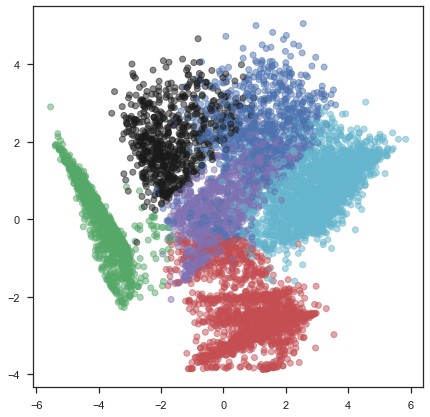

In [268]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [271]:
cluster_df_6 = pd.concat([cre_original[col_kpi], pd.Series(km_6.labels_, name = 'cluster_6')], axis = 1)

In [273]:
cluster_df_6.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,cluster_6
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,2
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,4
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,4
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,4


In [277]:
six_cluster = cluster_df_6.groupby('cluster_6').apply(lambda x : x[col_kpi].mean()).T
six_cluster

cluster_6,0,1,2,3,4,5
PURCHASES_TRX,11.896762,27.742922,0.033205,34.653320,7.744735,5.975645
Monthly_avg_purchase,47.243825,140.643565,0.098395,210.512330,78.395143,54.158471
Monthly_cash_advance,19.155048,243.934772,184.912834,3.942946,3.698390,205.903803
limit_usage,0.246733,0.595784,0.575884,0.262170,0.244966,0.607337
CASH_ADVANCE_TRX,0.484280,10.057758,6.435034,0.149012,0.133109,7.650430
payment_minpay,13.861937,3.835641,9.967837,8.610468,6.890777,3.254852
both_oneoff_installment,0.000000,0.894677,0.000000,1.000000,0.009267,0.000000
installment,1.000000,0.105323,0.017324,0.000000,0.000000,0.000000
one_off,0.000000,0.000000,0.000000,0.000000,0.990733,1.000000
none,0.000000,0.000000,0.982676,0.000000,0.000000,0.000000


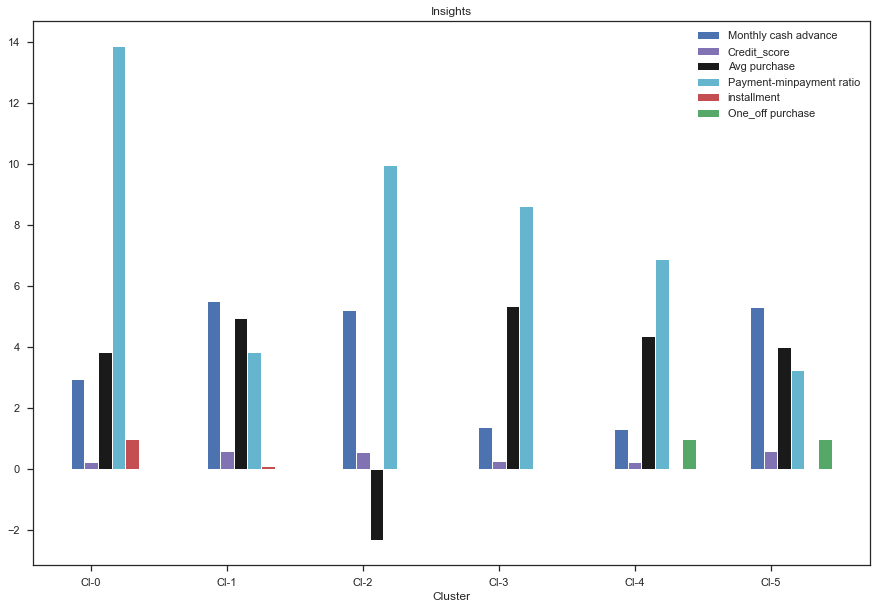

In [278]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [280]:
cash_advance = np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score = list(six_cluster.loc['limit_usage',:].values)
print(cash_advance)
print(credit_score)

[2.95256629 5.49690086 5.21988454 1.37192804 1.30789754 5.32740908]
[0.24673287577047076, 0.5957844119450174, 0.5758841059122126, 0.26216962861657617, 0.2449655598043664, 0.6073369693024394]


## Insights with  6 clusters

- Here also groups are overlapping .
     - Cl-0 and Cl-2 behaving same 


---


# Checking performance metrics for Kmeans
- I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [282]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [283]:
score={}
score_c={}
for n in range(3,10):
    km_score = KMeans( n_clusters = n )
    km_score.fit( reduced_cr )
    score_c[n] = calinski_harabaz_score(reduced_cr, km_score.labels_)
    score[n] = silhouette_score(reduced_cr, km_score.labels_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.p

In [286]:
score

{3: 0.37210314965302915,
 4: 0.45925855175949504,
 5: 0.4557517692878371,
 6: 0.4504050012138985,
 7: 0.4354151287225206,
 8: 0.4018492403653043,
 9: 0.39512255230495563}

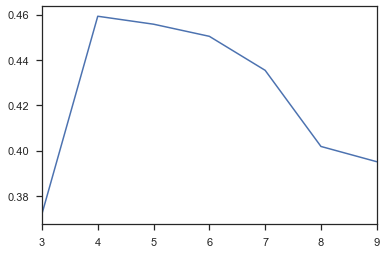

In [284]:
pd.Series(score).plot()

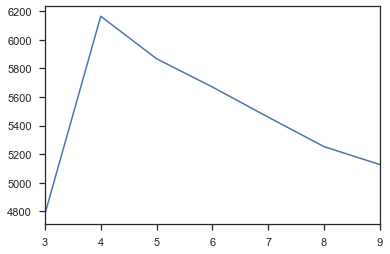

In [285]:
pd.Series(score_c).plot()

## Performance metrics also suggest that  K-means with 4 cluster is able to show distinguished characteristics of each cluster.




<big>
*** Insights with 4 Clusters ***



---

<big>



- Group 2 is the group of customers who have highest Monthly_avg purchases and doing both installment as well as one_off   purchases, have comparatively good credit score. *** This group is about 31% of the total customer base ***
 

 
- Group 1 is taking maximum advance_cash  and   is paying comparatively less minimum payment and poor credit_score & doing no purchase transaction. *** This group is about 23% of the total customer base ***



- Group 0 customers are doing maximum One_Off transactions  and  least payment ratio and credit_score on lower side *** This group is about 21% of the total customer base ***



- Group 3 customers have maximum credit score and  are paying dues and are doing maximum installment purchases. *** This group is about 25% of the total customer base ***


---



# Making Strategy Suggested : 
---


##  Group 2 (Cluster - 2)

    - This group is having highest Monthly_avg_purchase and doing purchases as well and maintaining the good credit score. So, We can give offers for new credit cards (Premium / gold). 
    - We can increase the credit limit or can decrese the interest rate.
    
    
 
## Group 1 (Cluster - 1)

    - This group is doing maximum Advance Cash and less credit score. So, We can target them as offering less interest rate on purchasing.
    
    
    
## Group 0 (Cluster - 0 )
    
    - This group is the risky group as the customer from this group doing only one off transaction means they ar using credit card only for paying bills etc. 
    - This group seems to be risky group
    
    
    
## Group 3 (Cluster - 3)

    - This group's customer maintaining the good credit comparitively and doing installment purchases and paying dues on time.
    - Giving Rewards will make them perform more purchases.
    
---

In [415]:
# Final Statistics for Project Report woth cluster 4

# Number of observation in each Group
size_cluster4 = pd.Series(km_4.labels_, name = 'size').value_counts().sort_index()
print(size_cluster4)

print('************')

# Percentage of Each Group
per_cluster4 = pd.Series(km_4.labels_, name = 'per').value_counts() * 100 / sum(pd.Series(km_4.labels_).value_counts())
print(per_cluster4.sort_index())

0    1874
1    2090
2    2758
3    2228
Name: size, dtype: int64
************
0    20.938547
1    23.351955
2    30.815642
3    24.893855
Name: per, dtype: float64


In [428]:
# col_kpi
for i in len(col_kpi):
    if (col_kpi[i] in credit_dummy.columns ) & ()

---
# Method 2 for selecting Cluster 
---

In [300]:
# Choose number of cluster with Silhoute Coefficients
from sklearn import metrics


In [303]:
# df

In [304]:
# Calculate SC for k = 4
metrics.silhouette_score(df, km_4.labels_)

0.45925855175949504

In [305]:
# calculate SC for K=3 through K=12
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters= k, random_state=123)
    km.fit(df)
    scores.append(metrics.silhouette_score(df, km.labels_))

In [307]:
scores

[0.33993068218893446,
 0.37210314965302915,
 0.45925855175949504,
 0.45577431618382525,
 0.4504050012138985,
 0.4354151287225206,
 0.3763788685919948,
 0.40481916128051887,
 0.36531754293141566,
 0.35935295169749903,
 0.35438729302850863,
 0.3575873444743642,
 0.3571753844440442,
 0.3588224743296071,
 0.35141621068566015,
 0.34326114677875325,
 0.3382476053248182,
 0.3418667796200063]

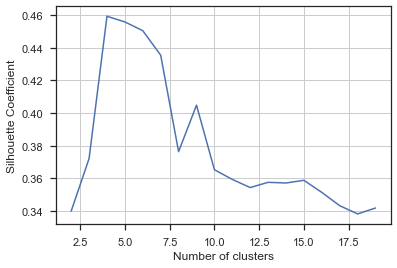

In [308]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 4-6 based on the SC score. If we take highest SC score, 4 segment solution is best

## Segment Distribution
   ### Finding optimal numer of clusters
   #### Elbow Analysis

In [310]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df )
    cluster_errors.append( clusters.inertia_ )

In [311]:
cluster_errors

[87025.72557083321,
 64500.62928999097,
 43508.38143609571,
 36826.421250317515,
 32005.210341686845,
 28621.3162494951,
 26386.343384816388,
 23881.60599247657,
 22403.747613439842,
 20145.093697824064,
 18547.888044620668,
 17357.69612186348,
 16395.020463622583,
 15695.364869399247,
 14611.434974138092,
 14126.252546062482,
 13650.359229422756,
 13278.432201738093]

In [312]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,87025.725571
1,3,64500.629290
2,4,43508.381436
3,5,36826.421250
4,6,32005.210342
5,7,28621.316249
6,8,26386.343385
7,9,23881.605992
8,10,22403.747613
9,11,20145.093698


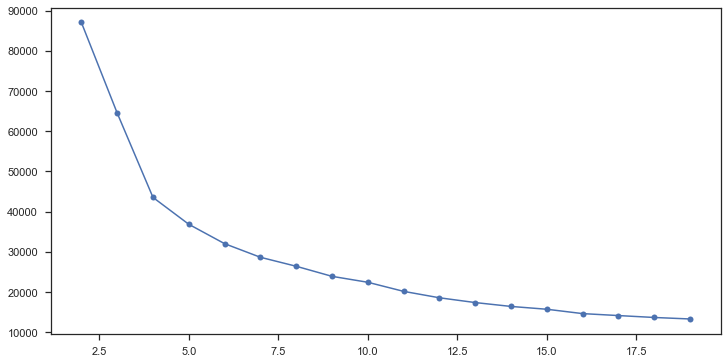

In [313]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 4 to 5 to 6. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

In [316]:
print( credit_dummy.cluster_4.value_counts() / sum(credit_dummy.cluster_4.value_counts()))
print('*******************************')
print( credit_dummy.cluster_5.value_counts() / sum(credit_dummy.cluster_5.value_counts()))

2    0.308156
3    0.248939
1    0.233520
0    0.209385
Name: cluster_4, dtype: float64
*******************************
1    0.238101
0    0.232849
2    0.221788
3    0.207821
4    0.099441
Name: cluster_5, dtype: float64


# Profiling
---

In [346]:
pd.Series.sort_index(credit_dummy.cluster_5.value_counts())
pd.Series(credit_dummy.cluster_4.size)

0    8950
dtype: int64

In [347]:
size = pd.concat([pd.Series(credit_dummy.cluster_4.size),
                  pd.Series.sort_index(credit_dummy.cluster_4.value_counts()),
                  pd.Series.sort_index(credit_dummy.cluster_5.value_counts()), 
                  pd.Series.sort_index(credit_dummy.cluster_6.value_counts()),
                  pd.Series.sort_index(credit_dummy.cluster_7.value_counts()), 
                  pd.Series.sort_index(credit_dummy.cluster_8.value_counts())])

In [348]:
Seg_size = pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/credit_dummy.cluster_4.size, columns=['Seg_Pct'])

In [349]:
print(Seg_size.shape)
print(Seg_Pct.shape)

(31, 1)
(31, 1)


In [350]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,3,0,1,2,3,4,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,1874.000000,2090.00000,2758.000000,2228.000000,2084.000000,2131.000000,1985.000000,1860.000000,890.000000,...,672.000000,1186.000000,1450.000000,1607.000000,1954.000000,1183.000000,697.000000,840.000000,753.000000,466.000000
Seg_Pct,1.0,0.209385,0.23352,0.308156,0.248939,0.232849,0.238101,0.221788,0.207821,0.099441,...,0.075084,0.132514,0.162011,0.179553,0.218324,0.132179,0.077877,0.093855,0.084134,0.052067


In [439]:
# test = credit_dummy.groupby('cluster_4', as_index = True).apply(lambda x : x.count())
# test

In [351]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([credit_dummy.apply(lambda x: x.mean()).T, 
                             credit_dummy.groupby('cluster_4').apply(lambda x: x.mean()).T,
                             credit_dummy.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                             credit_dummy.groupby('cluster_6').apply(lambda x: x.mean()).T,
                             credit_dummy.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                             credit_dummy.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [352]:
Profling_output

,0,0,1,2,3,0,1,2,3,4,...,5,6,0,1,2,3,4,5,6,7
BALANCE_FREQUENCY,0.619940,0.593512,0.624266,0.664154,0.583378,0.624090,0.579703,0.656361,0.593195,0.681226,...,0.683332,0.551256,0.682741,0.679436,0.658794,0.552265,0.664928,0.681003,0.384895,0.430676
ONEOFF_PURCHASES,3.204274,5.829708,0.016616,6.420329,0.005111,0.006064,0.000000,6.496492,5.825434,5.544686,...,0.000000,5.962880,0.000000,0.000000,6.505967,5.969748,5.566701,5.937856,0.046563,0.001139
INSTALLMENTS_PURCHASES,3.352403,0.012934,0.080192,6.157720,5.758160,0.065964,5.744769,6.218078,0.010934,5.911479,...,5.804666,0.034970,5.975052,0.064938,6.228063,0.021584,0.000000,5.989125,5.309714,0.024853
PURCHASES_FREQUENCY,0.361268,0.257122,0.003407,0.579097,0.514914,0.002729,0.513699,0.586086,0.256267,0.553852,...,0.504129,0.279161,0.578246,0.002148,0.587595,0.279513,0.217717,0.557336,0.387580,0.001831
ONEOFF_PURCHASES_FREQUENCY,0.158699,0.256849,0.000481,0.339991,0.000144,0.000290,0.000000,0.356384,0.256006,0.265347,...,0.000000,0.278667,0.000000,0.000000,0.357200,0.279223,0.217611,0.285094,0.001106,0.000172
PURCHASES_INSTALLMENTS_FREQUENCY,0.270072,0.000381,0.002536,0.476472,0.492378,0.002029,0.491679,0.481393,0.000327,0.459518,...,0.482957,0.000877,0.557395,0.001920,0.482692,0.000587,0.000000,0.462963,0.361868,0.001247
CASH_ADVANCE_FREQUENCY,0.113512,0.103712,0.233475,0.088762,0.039862,0.232196,0.023785,0.010621,0.100186,0.307780,...,0.144400,0.008483,0.047979,0.255329,0.009582,0.008646,0.267746,0.294853,0.003397,0.150747
CASH_ADVANCE_TRX,0.817570,0.731837,1.672004,0.650077,0.295506,1.664961,0.199163,0.094567,0.713928,2.143185,...,1.050454,0.076636,0.376124,1.778543,0.085719,0.077759,1.860547,2.082914,0.027703,1.259568
PURCHASES_TRX,1.894731,1.616401,0.024124,3.176189,2.297287,0.019794,2.286877,3.212092,1.611163,3.000551,...,2.340323,1.681676,2.500698,0.016212,3.219129,1.682723,1.497293,3.044579,1.884719,0.010047
Monthly_avg_purchase,3.050877,3.472944,0.039545,4.777715,3.383062,0.030319,3.368783,4.841013,3.467561,4.499115,...,3.420725,3.596467,3.587416,0.026632,4.850286,3.600247,3.239703,4.558406,2.963942,0.011297


In [353]:
Profling_output_final = pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0 )

In [354]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [355]:
Profling_output_final

,Overall,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,1874.000000,2090.000000,2758.000000,2228.000000,2084.000000,2131.000000,1985.000000,1860.000000,890.000000,...,672.000000,1186.000000,1450.000000,1607.000000,1954.000000,1183.000000,697.000000,840.000000,753.000000,466.000000
Seg_Pct,1.000000,0.209385,0.233520,0.308156,0.248939,0.232849,0.238101,0.221788,0.207821,0.099441,...,0.075084,0.132514,0.162011,0.179553,0.218324,0.132179,0.077877,0.093855,0.084134,0.052067
BALANCE_FREQUENCY,0.619940,0.593512,0.624266,0.664154,0.583378,0.624090,0.579703,0.656361,0.593195,0.681226,...,0.683332,0.551256,0.682741,0.679436,0.658794,0.552265,0.664928,0.681003,0.384895,0.430676
ONEOFF_PURCHASES,3.204274,5.829708,0.016616,6.420329,0.005111,0.006064,0.000000,6.496492,5.825434,5.544686,...,0.000000,5.962880,0.000000,0.000000,6.505967,5.969748,5.566701,5.937856,0.046563,0.001139
INSTALLMENTS_PURCHASES,3.352403,0.012934,0.080192,6.157720,5.758160,0.065964,5.744769,6.218078,0.010934,5.911479,...,5.804666,0.034970,5.975052,0.064938,6.228063,0.021584,0.000000,5.989125,5.309714,0.024853
PURCHASES_FREQUENCY,0.361268,0.257122,0.003407,0.579097,0.514914,0.002729,0.513699,0.586086,0.256267,0.553852,...,0.504129,0.279161,0.578246,0.002148,0.587595,0.279513,0.217717,0.557336,0.387580,0.001831
ONEOFF_PURCHASES_FREQUENCY,0.158699,0.256849,0.000481,0.339991,0.000144,0.000290,0.000000,0.356384,0.256006,0.265347,...,0.000000,0.278667,0.000000,0.000000,0.357200,0.279223,0.217611,0.285094,0.001106,0.000172
PURCHASES_INSTALLMENTS_FREQUENCY,0.270072,0.000381,0.002536,0.476472,0.492378,0.002029,0.491679,0.481393,0.000327,0.459518,...,0.482957,0.000877,0.557395,0.001920,0.482692,0.000587,0.000000,0.462963,0.361868,0.001247
CASH_ADVANCE_FREQUENCY,0.113512,0.103712,0.233475,0.088762,0.039862,0.232196,0.023785,0.010621,0.100186,0.307780,...,0.144400,0.008483,0.047979,0.255329,0.009582,0.008646,0.267746,0.294853,0.003397,0.150747
CASH_ADVANCE_TRX,0.817570,0.731837,1.672004,0.650077,0.295506,1.664961,0.199163,0.094567,0.713928,2.143185,...,1.050454,0.076636,0.376124,1.778543,0.085719,0.077759,1.860547,2.082914,0.027703,1.259568


In [356]:
Profling_output_final.to_csv('Profiling_output.csv')

In [357]:

credit.shape

(8950, 23)